<a href="https://colab.research.google.com/github/Phurin216/Datawarehouse/blob/main/HW_Data_Preprocessing_67_653020216_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
Titanic_df=pd.read_excel('/content/drive/MyDrive/Bigdata/titanic3.xls')
Titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
'Titanic_df' in locals()

True

จากข้อมูลที่ให้มา มีค่าว่างสูญหายมากน้อยแค่ไหน? และมีค่าผิดปกติ (outliers) และหรือข้อมูลรบกวน (noisy data) หรือไม่ในแต่ละตัวแปร?

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


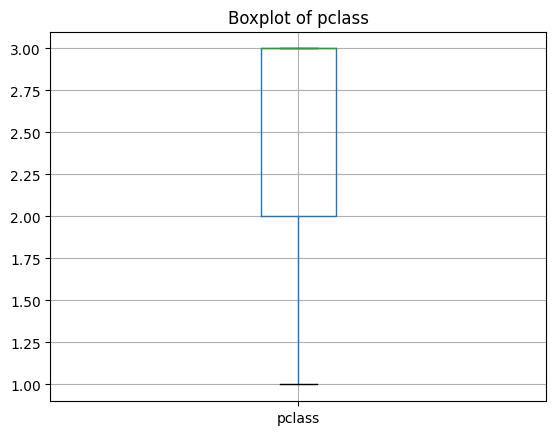

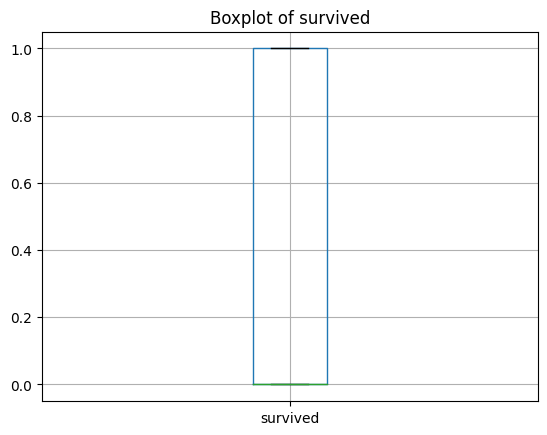

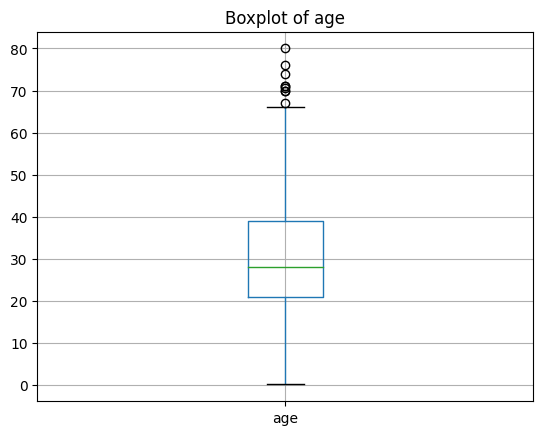

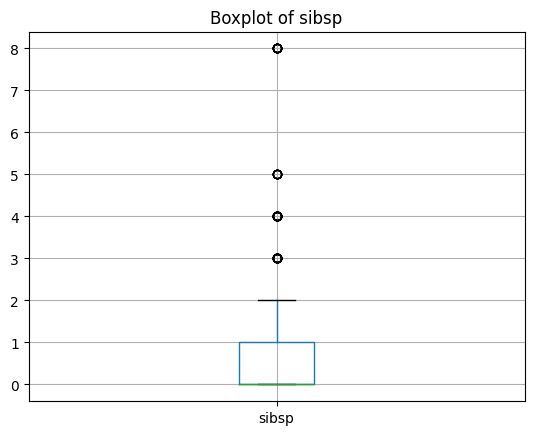

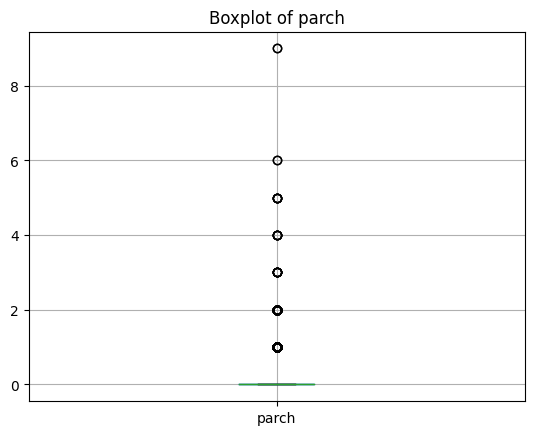

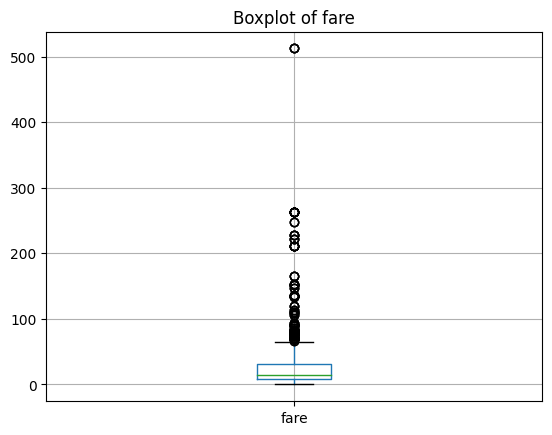

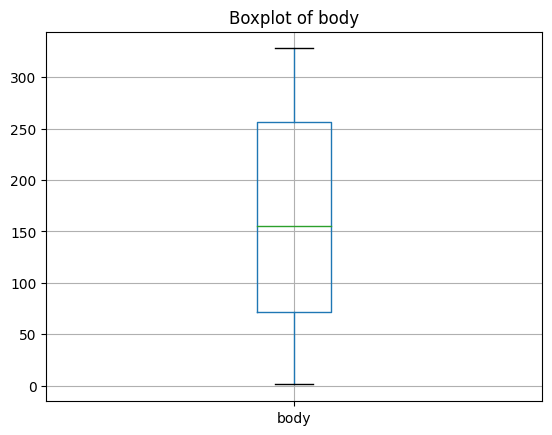

In [ ]:
# prompt: จากข้อมูลที่ให้มา มีค่าว่างสูญหายมากน้อยแค่ไหน? และมีค่าผิดปกติ (outliers) และหรือข้อมูลรบกวน (noisy data) หรือไม่ในแต่ละตัวแปร?

# ตรวจสอบค่าว่างสูญหาย

print(Titanic_df.isnull().sum())

# ดูภาพรวมของข้อมูล
Titanic_df.describe()

# ตรวจสอบค่าผิดปกติ (outliers) ด้วย boxplot
for column in Titanic_df.select_dtypes(include=['number']).columns:
  plt.figure()
  Titanic_df.boxplot(column=column)
  plt.title(f'Boxplot of {column}')
  plt.show()


มีค่า outlier ในแต่ละคอลัมน์ ต่อไปนี้
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     56

#เตรียมข้อมูลให้พร้อมโดยการจัดการกับค่าว่างในข้อมูล ให้อธิบายวิธีที่ท่านเลือกใช้ พร้อมยกเหตุผลประกอบ

In [ ]:
# prompt: เตรียมข้อมูลให้พร้อมโดยการจัดการกับค่าว่างในข้อมูล ให้อธิบายวิธีที่ท่านเลือกใช้ พร้อมยกเหตุผลประกอบ

# ตรวจสอบค่าว่างสูญหายอีกครั้ง

print(Titanic_df.isnull().sum())
#  จัดการกับค่าว่างสูญหายในคอลัมน์ Age
#  ใช้ค่าเฉลี่ย (mean) แทนค่าว่างสูญหายในคอลัมน์ Age
#  เนื่องจากคอลัมน์ Age มีการกระจายตัวของข้อมูลที่ค่อนข้างสมดุล
Titanic_df['age'].fillna(Titanic_df['age'].mean(), inplace=True)

#  จัดการกับค่าว่างสูญหายในคอลัมน์ Embarked
#  ใช้ค่าที่พบมากที่สุด (mode) แทนค่าว่างสูญหายในคอลัมน์ Embarked
#  เนื่องจากคอลัมน์ Embarked เป็นข้อมูลเชิงหมวดหมู่
Titanic_df['embarked'].fillna(Titanic_df['embarked'].mode()[0], inplace=True)

#  จัดการกับค่าว่างสูญหายในคอลัมน์ Cabin
#  เนื่องจากคอลัมน์ Cabin มีค่าว่างสูญหายจำนวนมาก
#  และไม่สามารถใช้ค่าเฉลี่ยหรือค่าที่พบมากที่สุดได้
# จึงตัดคอลัมน์ cabin ออกจากข้อมูล






#  ตรวจสอบค่าว่างสูญหายอีกครั้ง
print(Titanic_df.isnull().sum())


pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    0
dtype: int64
pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    0
dtype: int64


โค้ดสำหรับการจัดการ Outlier

In [ ]:
#  จัดการกับค่าว่างสูญหายในคอลัมน์ Age
#  ใช้ค่าเฉลี่ย (mean) แทนค่าว่างสูญหายในคอลัมน์ Age
#  เนื่องจากคอลัมน์ Age มีการกระจายตัวของข้อมูลที่ค่อนข้างสมดุล
Titanic_df['age'].fillna(Titanic_df['age'].mean(), inplace=True)

#  จัดการกับค่าว่างสูญหายในคอลัมน์ Embarked
#  ใช้ค่าที่พบมากที่สุด (mode) แทนค่าว่างสูญหายในคอลัมน์ Embarked
#  เนื่องจากคอลัมน์ Embarked เป็นข้อมูลเชิงหมวดหมู่
Titanic_df['embarked'].fillna(Titanic_df['embarked'].mode()[0], inplace=True)

#  จัดการกับค่าว่างสูญหายในคอลัมน์ Cabin
#  เนื่องจากคอลัมน์ Cabin มีค่าว่างสูญหายจำนวนมาก
#  และไม่สามารถใช้ค่าเฉลี่ยหรือค่าที่พบมากที่สุดได้
# จึงตัดคอลัมน์ cabin ออกจากข้อมูล
# Check if the column name is 'Cabin' instead of 'cabin'
Titanic_df.drop('Cabin', axis=1, inplace=True, errors='ignore')
# The errors='ignore' parameter will prevent an error from being raised if the column doesn't exist.

#  จึงตัดคอลัมน์ body ออกจากข้อมูล
Titanic_df.drop('body', axis=1, inplace=True, errors='ignore')
#  จึงตัดคอลัมน์ boat ออกจากข้อมูล
Titanic_df.drop('boat', axis=1, inplace=True, errors='ignore')
#  จึงตัดคอลัมน์ home.dest ออกจากข้อมูล
Titanic_df.drop('home.dest', axis=1, inplace=True, errors='ignore')

In [ ]:
# i. ใช้ one-hot encoding ในการแปลงตัวแปร Embarked
Titanic_df = pd.get_dummies(Titanic_df, columns=['embarked'])

# ii. แปลงตัวแปร Sex โดยให้เพศชายเป็น 0 และเพศหญิงเป็น 1
Titanic_df['sex'] = Titanic_df['sex'].map({'male': 0, 'female': 1})

# iii. สร้างตัวแปร FamilySize
Titanic_df['FamilySize'] = Titanic_df['sibsp'] + Titanic_df['parch']

# iv. สร้างตัวแปร IsAlone
Titanic_df['IsAlone'] = np.where(Titanic_df['FamilySize'] > 0, 0, 1)

In [ ]:
# i. ตัวแปร Fare และ Age ใช้ Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Titanic_df[['age', 'fare']] = scaler.fit_transform(Titanic_df[['age', 'fare']])

# ii. สร้างตัวแปรใหม่ Fare_Per_Person
Titanic_df['Fare_Per_Person'] = Titanic_df['fare'] / (Titanic_df['FamilySize'] + 1)

# iii. สร้างตัวแปร AgeGroup
Titanic_df['AgeGroup'] = pd.cut(Titanic_df['age'], bins=[0, 12, 18, 50, 100],
                                 labels=['Child', 'Teenager', 'Adult', 'Elder'], right=False)

In [ ]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [ ]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), [0,2,5,8])

[(0, 2], (5, 8], (2, 5], (2, 5], (5, 8], (2, 5]]
Categories (3, interval[int64, right]): [(0, 2] < (2, 5] < (5, 8]]

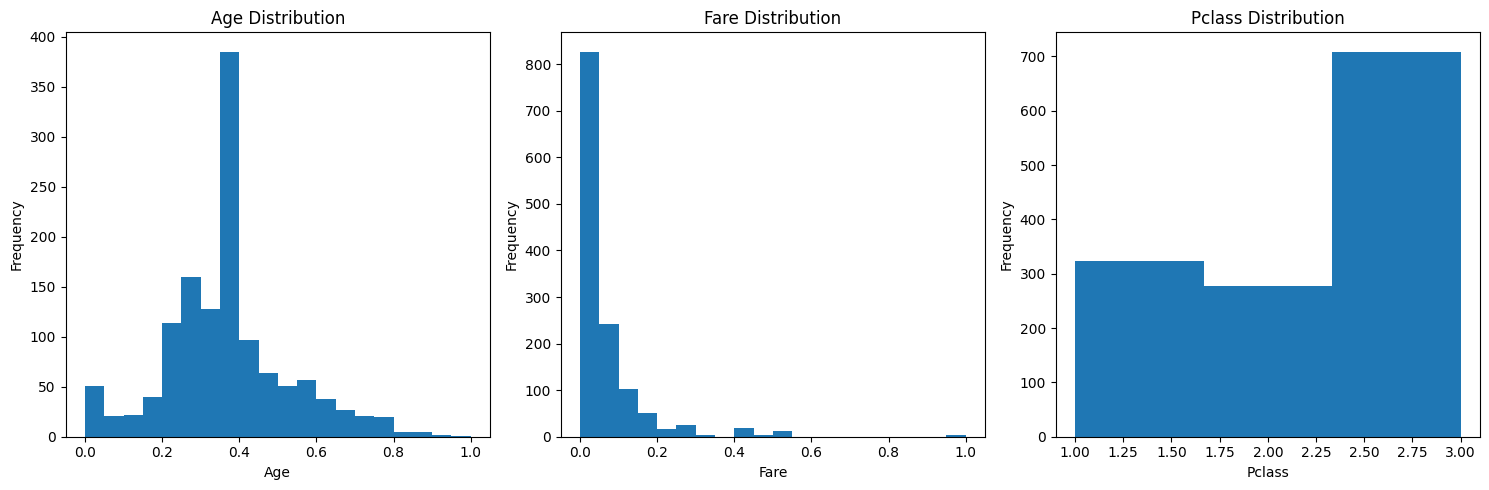

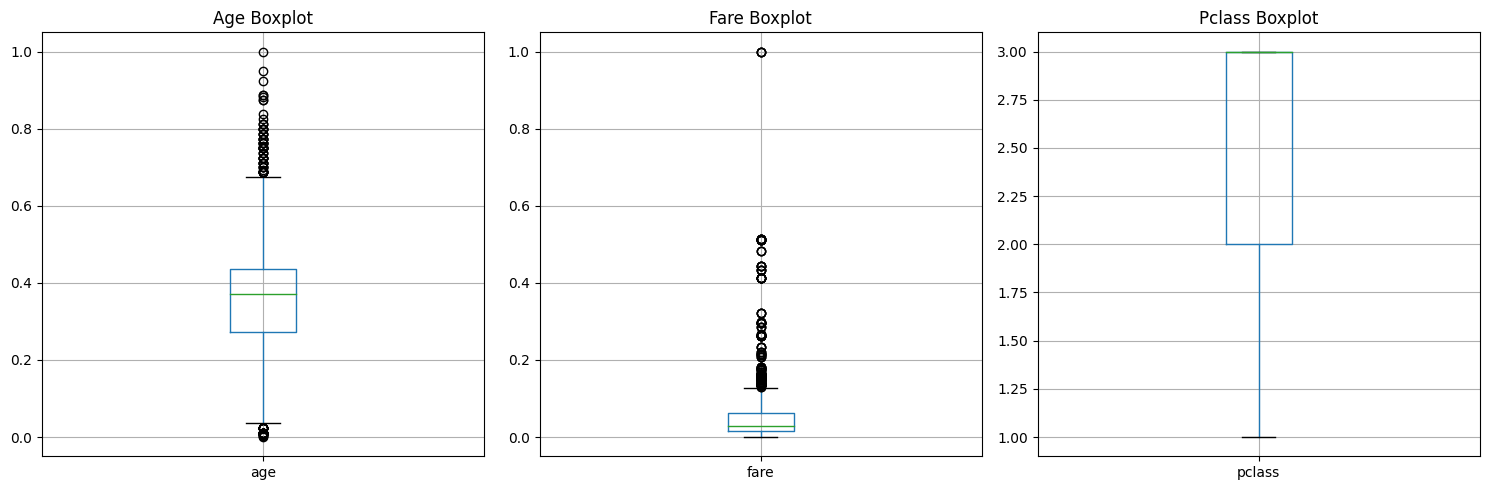

In [ ]:
# prompt: (10 points) นำเสนอการแจกแจงหรือทำความเข้าใจตัวแปรสำคัญในข้อมูล เช่น Age, Fare, and Pclass ด้วยการสร้างฮิสโตแกรมหรือแผนภาพกล่อง

# Histograms for Age, Fare, and Pclass
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(Titanic_df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(Titanic_df['fare'], bins=20)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(Titanic_df['pclass'], bins=3)
plt.title('Pclass Distribution')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots for Age, Fare, and Pclass
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
Titanic_df.boxplot(column='age')
plt.title('Age Boxplot')

plt.subplot(1, 3, 2)
Titanic_df.boxplot(column='fare')
plt.title('Fare Boxplot')

plt.subplot(1, 3, 3)
Titanic_df.boxplot(column='pclass')
plt.title('Pclass Boxplot')

plt.tight_layout()
plt.show()


pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64


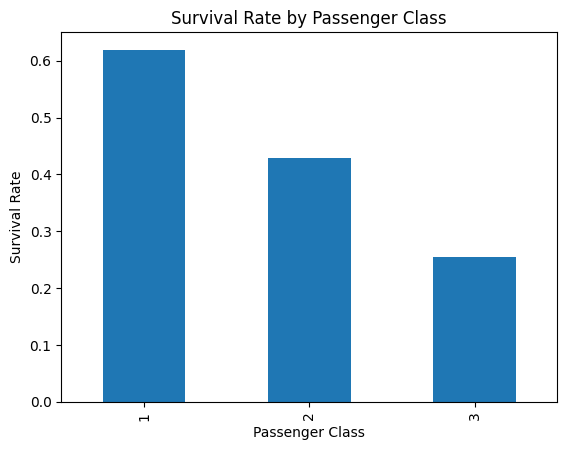

sex
0    0.190985
1    0.727468
Name: survived, dtype: float64


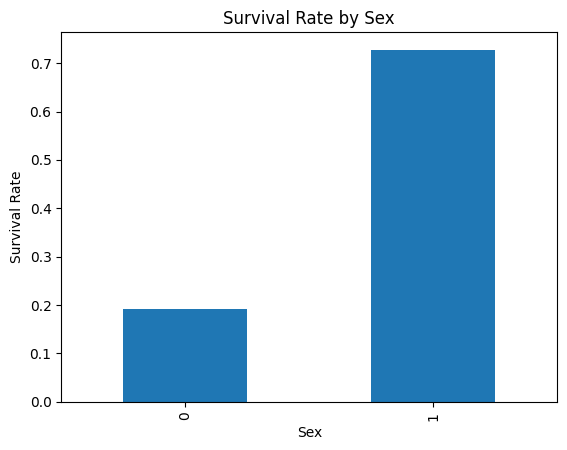

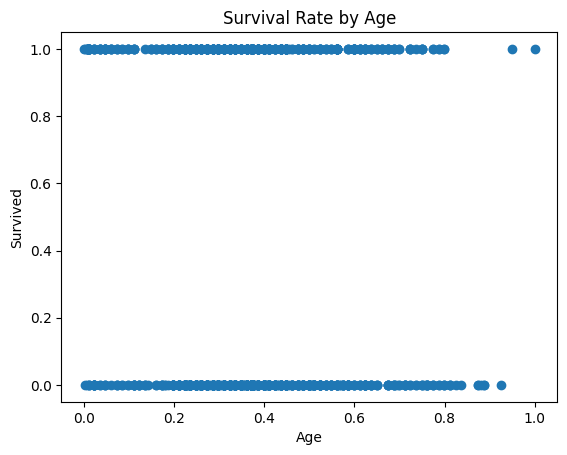

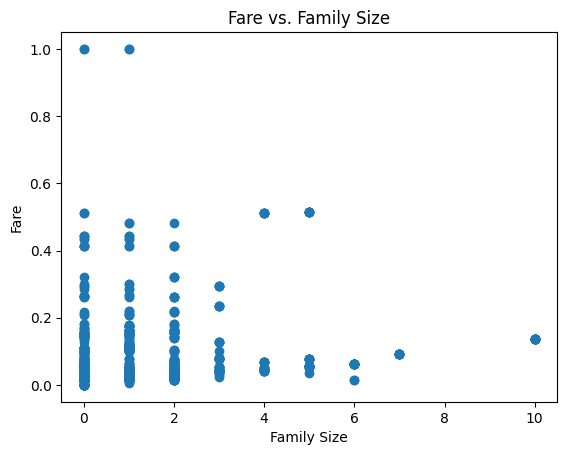

In [ ]:
# prompt: เมื่อเตรียมข้อมูลพร้อมแล้ว ให้หาความสัมพันธ์ของตัวแปรต่อไปนี้จากข้อมูล ซึ่งอาจนำเสนอด้วยสถิติและแผนภูมิหรือกราฟก็ได้: \
#     i. (10 points) survived และ pclass \
#     ii. (10 points) survived และ sex \
#     iii. (10 points) survived และ age \
#     iv. (10 points) จำนวนสมาชิกครอบครัวที่รอดชีวิต และ Fare

# i. survived และ pclass
print(Titanic_df.groupby('pclass')['survived'].mean())

# สร้างแผนภูมิแท่งเพื่อแสดงความสัมพันธ์ระหว่าง survived และ pclass
Titanic_df.groupby('pclass')['survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# ii. survived และ sex
print(Titanic_df.groupby('sex')['survived'].mean())

# สร้างแผนภูมิแท่งเพื่อแสดงความสัมพันธ์ระหว่าง survived และ sex
Titanic_df.groupby('sex')['survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# iii. survived และ age
# สร้าง scatter plot เพื่อแสดงความสัมพันธ์ระหว่าง survived และ age
plt.scatter(Titanic_df['age'], Titanic_df['survived'])
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

# iv. จำนวนสมาชิกครอบครัวที่รอดชีวิต และ Fare
# สร้าง scatter plot เพื่อแสดงความสัมพันธ์ระหว่าง FamilySize และ Fare
plt.scatter(Titanic_df['FamilySize'], Titanic_df['fare'])
plt.title('Fare vs. Family Size')
plt.xlabel('Family Size')
plt.ylabel('Fare')
plt.show()


In [ ]:
# prompt: (10 points) สร้างตารางสรุปข้อมูลเพื่อหาคุณลักษณะของผู้โดยสารเรือไททานิค และศึกษาเกี่ยวกับการเสียชีวิตของผู้โดยสาร ทำการสรุปผลที่ได้จากตาราง

# สร้างตารางสรุปข้อมูล
summary_table = Titanic_df.groupby(['survived', 'sex', 'pclass'])['age'].agg(['mean', 'count'])

# แสดงตารางสรุปข้อมูล
print(summary_table)

# สรุปผลที่ได้จากตาราง
# - ผู้โดยสารหญิงมีอัตราการรอดชีวิตสูงกว่าผู้โดยสารชาย
# - ผู้โดยสารชั้น 1 มีอัตราการรอดชีวิตสูงกว่าผู้โดยสารชั้น 2 และ 3
# - อายุเฉลี่ยของผู้โดยสารที่รอดชีวิตมีแนวโน้มสูงกว่าผู้โดยสารที่เสียชีวิต
# - จำนวนผู้โดยสารชั้น 3 มีจำนวนมากที่สุด


                         mean  count
survived sex pclass                 
0        0   1       0.515529    118
             2       0.409402    146
             3       0.344384    418
         1   1       0.438831      5
             2       0.420544     12
             3       0.313334    110
1        0   1       0.440631     61
             2       0.228941     25
             3       0.298847     75
         1   1       0.455583    139
             2       0.333342     94
             3       0.295067    106
